# Homework: Open-Source LLMs

### Imports

In [1]:
from openai import OpenAI

## Q1. Running Ollama with Docker

After running the Docker command in terminal, we can check the name of the process:

In [2]:
!docker ps

CONTAINER ID   IMAGE           COMMAND               CREATED          STATUS          PORTS                                           NAMES
d7a17c2ed6db   ollama/ollama   "/bin/ollama serve"   13 minutes ago   Up 12 minutes   0.0.0.0:11434->11434/tcp, :::11434->11434/tcp   ollama


Again, I run in the terminal the commands to check the Ollama version:

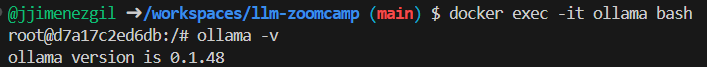

**Answer:** 0.1.48

## Q2. Downloading an LLM

Download the model:
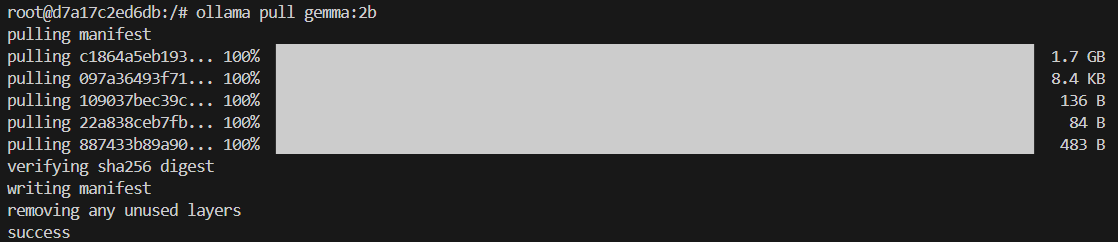

And check the metadata:
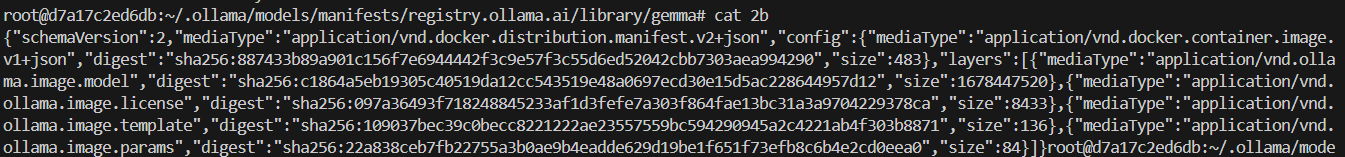

**Answer:** 
{"schemaVersion":2,"mediaType":"application/vnd.docker.distribution.manifest.v2+json","config":{"mediaType":"application/vnd.docker.container.image.v1+json","digest":"sha256:887433b89a901c156f7e6944442f3c9e57f3c55d6ed52042cbb7303aea994290","size":483},"layers":[{"mediaType":"application/vnd.ollama.image.model","digest":"sha256:c1864a5eb19305c40519da12cc543519e48a0697ecd30e15d5ac228644957d12","size":1678447520},{"mediaType":"application/vnd.ollama.image.license","digest":"sha256:097a36493f718248845233af1d3fefe7a303f864fae13bc31a3a9704229378ca","size":8433},{"mediaType":"application/vnd.ollama.image.template","digest":"sha256:109037bec39c0becc8221222ae23557559bc594290945a2c4221ab4f303b8871","size":136},{"mediaType":"application/vnd.ollama.image.params","digest":"sha256:22a838ceb7fb22755a3b0ae9b4eadde629d19be1f651f73efb8c6b4e2cd0eea0","size":84}]}

## Q3. Running the LLM

In [2]:
# Connect woth Ollama through OpenAI API
client = OpenAI(
    base_url='http://localhost:11434/v1/',
    api_key='ollama',
)

In [5]:
# Function that uses chat completions to send a prompt to gemma model
def llm(prompt):
    response = client.chat.completions.create(
        model='gemma:2b',
        messages=[{"role": "user", "content": prompt}]
    )
    
    return response.choices[0].message.content

In [9]:
# Call function with the specified prompt
response = llm("10 * 10")
print(response)

Sure, here is the answer:

```
100

```

The expression 10 * 10


In different calls the model answered in different ways, and it was not always giving the result of the operation. Something similar happened when using the model directly in terminal:
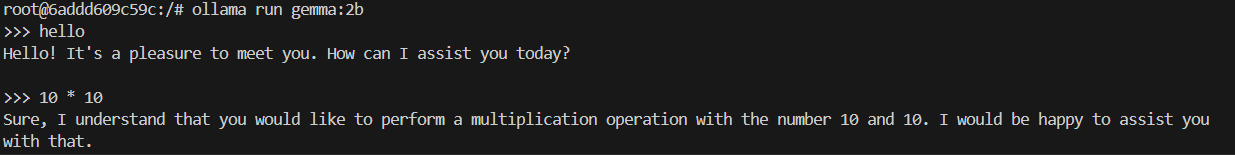

## Q4. Downloading the weights

After creating the directory and mapping the ollama files into it, this is the result of the *du -h* command:
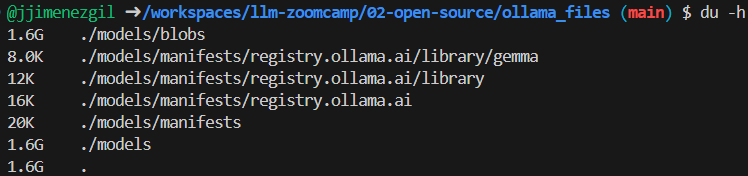

**Answer:** the closest answer is 1.7G

## Q5. Adding the weights

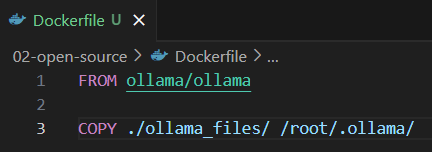

**Answer:** ./ollama_files/ /root/.ollama/

## Q6. Serving it

In [12]:
prompt = "What's the formula for energy?"

client = OpenAI(
    base_url='http://localhost:11434/v1/',
    api_key='ollama',
)

def llm(prompt):
    response = client.chat.completions.create(
        model='gemma:2b',
        messages=[{"role": "user", "content": prompt}],
        temperature=0.0
    )
    
    return response

In [14]:
response = llm(prompt)

In [21]:
# LLM Answer
print(response.choices[0].message.content)

Sure, here's the formula for energy:

**E = K + U**

Where:

* **E** is the energy in joules (J)
* **K** is the kinetic energy in joules (J)
* **U** is the potential energy in joules (J)

**Kinetic energy (K)** is the energy an object possesses when it moves or is in motion. It is calculated as half the product of an object's mass (m) and its velocity (v) squared:

**K = 1/2 * m * v^2**

**Potential energy (U)** is the energy an object possesses when it is in a position or has a specific configuration. It is calculated as the product of an object's mass and the gravitational constant (g) multiplied by the height or distance of the object from a reference point.

**Gravitational potential energy (U)** is given by the formula:

**U = mgh**

Where:

* **m** is the mass of the object in kilograms (kg)
* **g** is the acceleration due to gravity in meters per second squared (m/s^2)
* **h** is the height or distance of the object in meters (m)

The formula for energy can be used to calculate 

In [22]:
# Number of tokens
response.usage

CompletionUsage(completion_tokens=304, prompt_tokens=0, total_tokens=304)

**Answer:** 304